## PROBLEM STATEMENT-A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


#METADATA- a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

### Importing packages

In [5]:
 import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [3]:
# Data Preparation

In [6]:
df_data= pd.read_csv("E:\\deeksha\\python\\data\\Company_Data.csv")

In [7]:
df_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
df_data.tail(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


### Checking shape and size of the data

In [9]:
df_data.shape , df_data.size

((400, 11), 4400)

### Checking for nulls, na's and duplicates in data

In [10]:
# checkings null values

In [11]:
df_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [12]:
# checking na values

In [13]:
df_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [14]:
# checking any duplicate values

In [15]:
df_data.duplicated().sum()

0

### Checking Features 

In [16]:
df_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

### Checking Uniques values in Features

In [17]:
df_data['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df_data['US'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df_data['Education'].unique()

array([17, 10, 12, 14, 13, 16, 15, 18, 11], dtype=int64)

In [20]:
df_data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [21]:
df_data['Population'].unique().any()

True

In [22]:
df_data['Advertising'].unique()

array([11, 16, 10,  4,  3, 13,  0, 15,  9,  2,  5, 12,  6, 14, 18, 19, 20,
       23,  1,  7, 24,  8, 17, 25, 26, 29, 22, 21], dtype=int64)

In [23]:
df_data['CompPrice'].unique().any()

True

In [24]:
df_data['Sales'].unique().any()

True

In [25]:
df_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### PERFORMING EDA ON DATA

In [26]:
# HISTOGRAM 

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

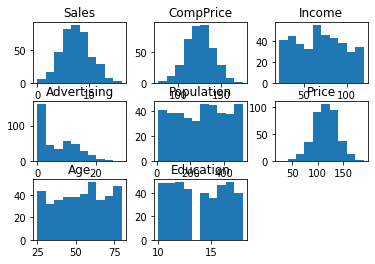

In [27]:
df_data.hist(grid=False)

### Checking unique values in columns

In [28]:
df_data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [29]:
df_data.groupby('ShelveLoc')['ShelveLoc'].count(
)

ShelveLoc
Bad        96
Good       85
Medium    219
Name: ShelveLoc, dtype: int64

In [30]:
S_count = df_data.groupby("ShelveLoc")["ShelveLoc"].count()

In [31]:
df_s_count = df_data.groupby("ShelveLoc")["ShelveLoc"].count().reset_index(name="count")

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

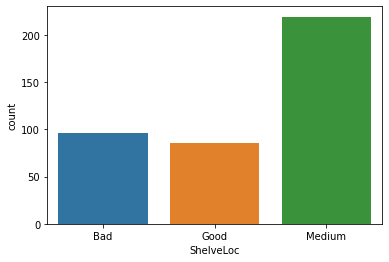

In [32]:
sns.barplot(x = "ShelveLoc" ,y = "count", data= df_s_count)

#### By the above bar plot we can say that maximum number of ShelveLoc lies in medium

In [33]:
df_data["US"].count()

400

In [34]:
df_us = df_data.groupby("US")["US"].count().reset_index(name = "Count")

<AxesSubplot:xlabel='US', ylabel='Count'>

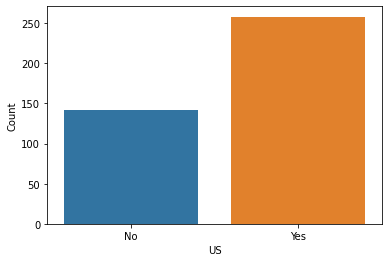

In [35]:
 sns.barplot(x = "US", y = "Count", data = df_us)

In [36]:
df_data[["Population","Age"]].corr()

,Population,Age
Population,1.000000,-0.042663
Age,-0.042663,1.000000


In [37]:
df_data[["Income","Age"]].corr()

,Income,Age
Income,1.00000,-0.00467
Age,-0.00467,1.00000


#### Checking Correlation between columns

<AxesSubplot:>

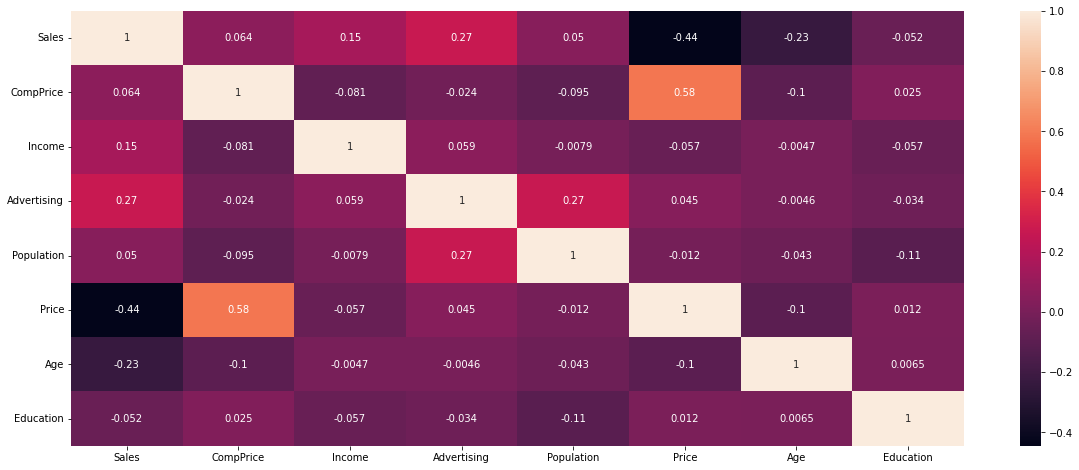

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (you can replace this with your own dataset)
data = df_data[["Sales","CompPrice","Income","Advertising","Population","Price","Age","Education"]]

# # Create a heatmap
# sns.set(style="whitegrid")  # Optional: Set the style of the plot
plt.figure(figsize=(20, 8))  # Optional: Set the size of the plot
# sns.heatmap(data, annot=True, cmap="YlGnBu", fmt=".2f")
sns.heatmap(data.corr(),annot=True)

In [39]:
# Scatterplot of population and advertising

<AxesSubplot:xlabel='Population', ylabel='Advertising'>

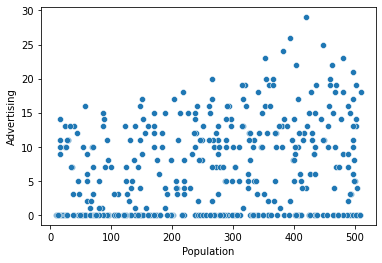

In [40]:
sns.scatterplot(x="Population", y="Advertising", data=df_data)

In [41]:
df_urban_count= df_data.groupby("Urban")['Urban'].count().reset_index(name="count")

<AxesSubplot:xlabel='Urban', ylabel='count'>

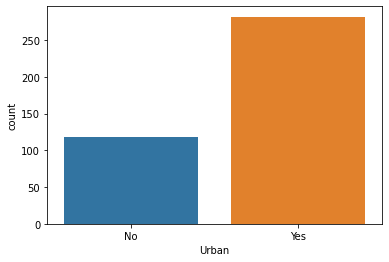

In [42]:
sns.barplot(x= "Urban", y="count",data=df_urban_count)

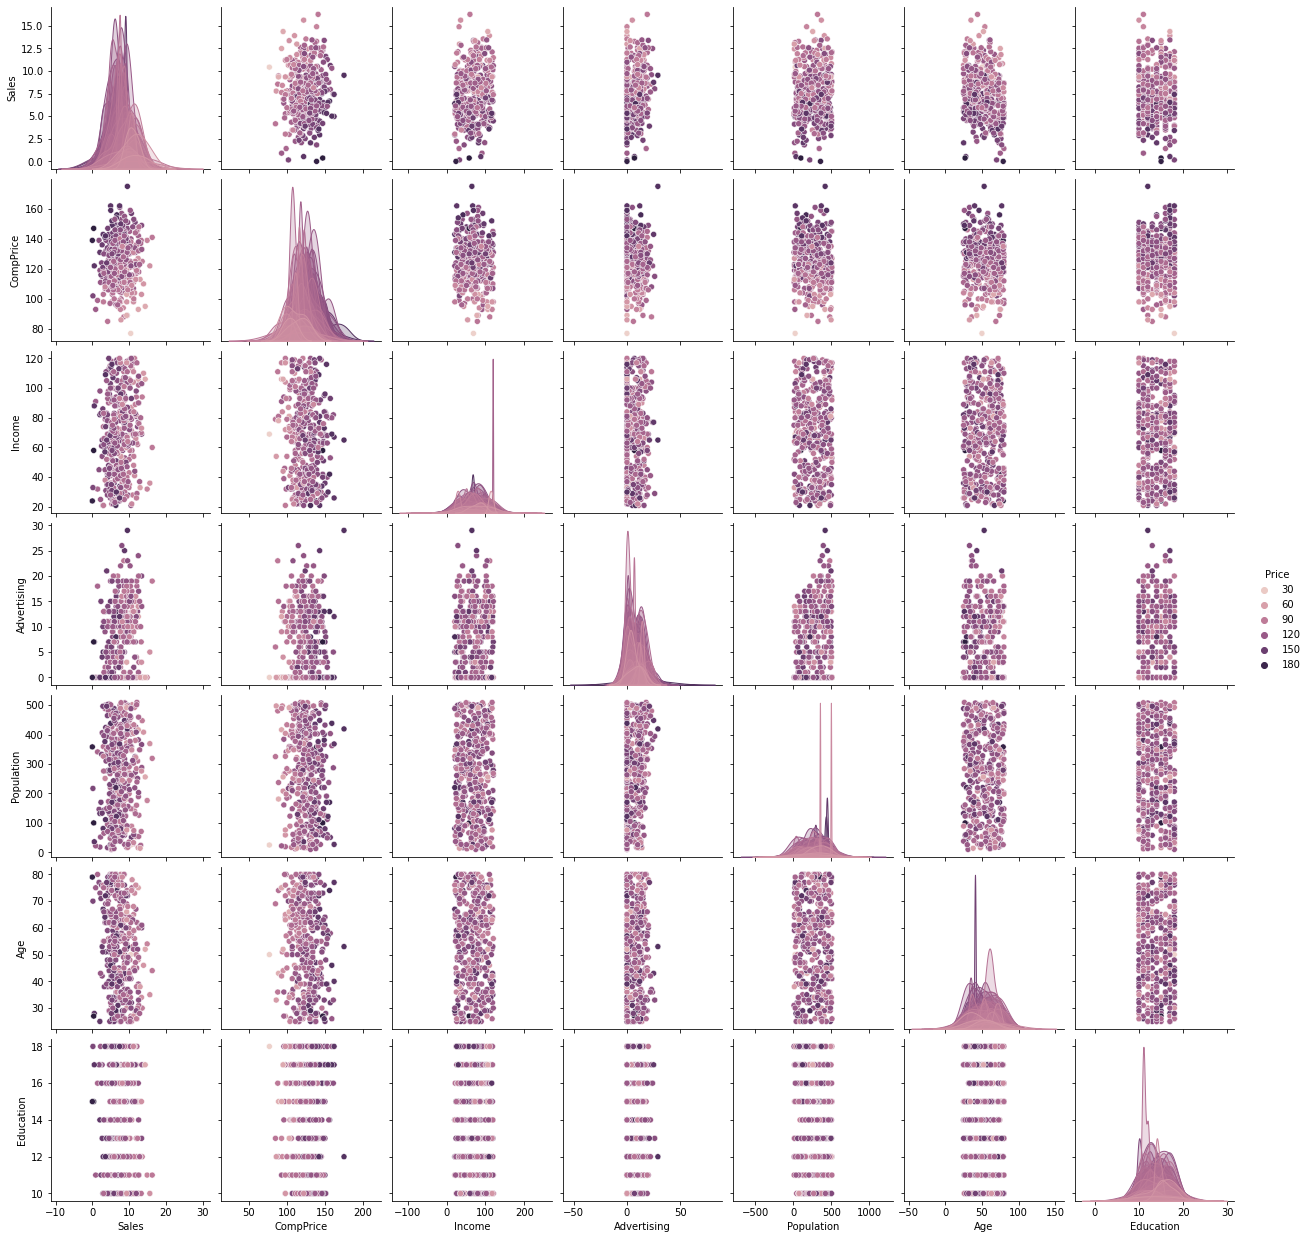

In [43]:
sns.pairplot(hue='Price' , data=df_data)

### converting categorical features into numeric using 1-hot-encodiing

In [44]:
df= pd.get_dummies(df_data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)

In [45]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


### Dividing the data into two parts( independent variable(X), dependent variable(y))

In [46]:
X= df.drop(["Sales"],axis=1)

In [47]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0


In [48]:
Y= df["Sales"]

In [49]:
 Y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [50]:
## Checking shape of X, y
X.shape, Y.shape

((400, 11), (400,))

###  Splitting the data into train, test

In [51]:
from sklearn.model_selection import train_test_split ,GridSearchCV, KFold, cross_val_score
X_train,X_test, Y_train , Y_test = train_test_split(X,Y,test_size= 0.2, random_state=110)

In [52]:
X_train.head(3)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
250,137,105,10,435,156,72,14,1,0,1,1
307,138,92,0,13,120,61,12,0,0,1,0
358,123,96,10,71,118,69,11,0,0,1,1


In [53]:
X_test.head(3)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
127,125,48,3,192,116,51,14,0,1,1,1
280,121,86,10,496,145,51,10,0,0,1,1
120,128,105,11,249,131,63,13,0,1,1,1


In [54]:
Y_train.head(3)

250    9.16
307    5.90
358    4.17
Name: Sales, dtype: float64

In [55]:
Y_test.head(3)

127    6.52
280    2.86
120    6.87
Name: Sales, dtype: float64

In [56]:
## Checking Shapes

In [57]:
X_train.shape 

(320, 11)

In [58]:
Y_train.shape

(320,)

## Building a Model using Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model = RandomForestRegressor(n_estimators=100, max_features=5,random_state=80)

In [60]:
model.fit(X_train, Y_train)

RandomForestRegressor(max_features=5, random_state=80)

In [61]:
y_pred = model.predict(X_train)

In [62]:
4.65267337e-01

0.465267337

In [64]:
y_pred

array([ 8.8756,  5.5605,  4.6968, 11.9836,  8.175 ,  6.2254,  8.1328,
        4.0215,  6.6308,  5.0056,  4.3899,  7.5147, 10.7033, 10.4321,
        7.5304,  4.8294,  5.4951,  5.8769, 10.8119,  6.0513,  6.3581,
        8.3202, 11.345 , 11.9057,  5.8637,  5.3888,  7.7549,  5.0811,
        6.3091, 12.4394,  7.7633,  3.8116,  7.7867,  6.0703,  9.3154,
        5.3834,  7.1796,  9.494 ,  4.0347,  5.5412,  5.3324,  6.3689,
        9.9388,  5.7501,  7.3752,  6.088 , 11.9681,  8.4811,  7.7388,
        5.6814, 10.9411,  8.5102,  5.7336, 11.9188,  6.2308,  9.3725,
        5.3634,  8.0109,  2.9891,  6.4852, 14.431 ,  5.7191,  9.863 ,
        9.6914,  7.7515,  8.3747,  7.4599, 11.0867,  4.052 ,  6.9541,
        6.4019,  8.8781,  6.7286,  8.1513, 12.7449,  1.5029,  7.9472,
       11.5857,  8.2052,  7.2612,  6.4171,  9.9868,  3.8893,  7.5386,
        6.8611,  8.862 ,  8.2735,  6.2199,  4.103 ,  7.1995,  9.9353,
       12.3872,  5.9027,  7.0529,  9.4429,  8.5307,  8.9806,  7.6887,
        6.4368,  5.6

In [63]:
y_pred_test = model.predict(X_test)

In [64]:
y_pred_test

array([ 7.0308,  5.0075,  6.5217, 10.8568,  5.4222,  7.9221,  5.9945,
        5.8325,  8.7827,  5.7232,  8.7553,  6.1175,  6.9475,  9.3435,
        5.6579,  8.2911,  6.0929,  6.2275,  7.0187,  6.6308,  5.7843,
        8.1168,  7.1098, 10.4106,  6.2235,  8.0134,  9.5314,  7.9082,
        6.4064,  7.1769,  6.3398,  7.3196,  6.2846,  8.0054,  6.6454,
        7.6923,  8.8574, 11.2733,  4.5153,  4.2995,  5.1821,  5.8479,
        9.523 ,  7.7992,  8.1969,  9.3901,  6.124 ,  8.2853,  9.5858,
       10.7211,  9.0827,  6.0629,  5.3632,  6.1229,  5.6939,  4.6345,
        6.1774,  6.6522,  6.0775, 10.9543,  8.4077,  5.5801,  6.3818,
        5.9624,  4.9615,  5.7791,  7.3908,  8.5947,  7.4913,  8.4699,
        7.825 ,  8.0501,  9.8829,  8.088 ,  8.1999,  7.2036,  9.8684,
        5.125 ,  7.5074,  6.9953])

In [65]:
y_pred = pd.DataFrame(y_pred , columns = ['ypredict'])

In [66]:
y_pred

,ypredict
0,8.8756
1,5.5605
2,4.6968
3,11.9836
4,8.1750
...,...
315,4.3336
316,4.7220
317,6.8107
318,8.4731


### Checking R-square

In [67]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [68]:
metrics.r2_score(Y_train,y_pred)

0.9577514005278706

In [69]:
print('The training r2_score is ', metrics.r2_score(Y_train,y_pred))

The training r2_score is  0.9577514005278706


In [70]:
metrics.r2_score(Y_test,y_pred_test)

0.6671038865914469

In [71]:
print('The training r2_score is ', metrics.r2_score(Y_test,y_pred_test))

The training r2_score is  0.6671038865914469


In [73]:
model.feature_importances_

array([0.10234151, 0.06008601, 0.08633413, 0.05311446, 0.25116988,
       0.10634217, 0.04052841, 0.23587469, 0.04752539, 0.00691958,
       0.00976376])

In [72]:
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,0,0,1,1
1,111,48,16,260,83,65,10,1,0,1,1
2,113,35,10,269,80,59,12,0,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1
396,139,23,3,37,120,55,11,0,1,0,1
397,162,26,12,368,159,40,18,0,1,1,1
398,100,79,7,284,95,50,12,0,0,1,1


## Checking which features are important

<AxesSubplot:>

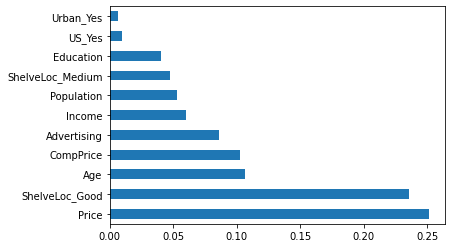

In [73]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).nlargest(100).plot(kind='barh')

## Cross- validation

In [74]:
num_trees = 150
max_features = 5
kfold = KFold(n_splits=5)

model = RandomForestRegressor(n_estimators=num_trees, max_features=10,random_state=90)
results = cross_val_score(model, X_train, Y_train, cv=kfold)

In [75]:
from sklearn.model_selection import cross_validate

In [76]:
cv_results = cross_validate(model, X_train, Y_train, cv=kfold, scoring=('r2', 'neg_mean_squared_error'))

In [77]:
cv_results

{'fit_time': array([0.24287724, 0.22178984, 0.21702981, 0.22934556, 0.24699664]),
 'score_time': array([0.01292181, 0.01221037, 0.01222134, 0.02060008, 0.01220345]),
 'test_r2': array([0.75051161, 0.62660849, 0.69709826, 0.60608712, 0.71364952]),
 'test_neg_mean_squared_error': array([-2.0850101 , -2.86231193, -2.40091043, -3.3386011 , -2.30735794])}

In [78]:
cv_results['test_r2'].mean()

0.6787910015734608

### Using Grid-SearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
estimator = RandomForestRegressor()
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
           
      
        }

grid = GridSearchCV(model, para_grids, scoring = 'r2')
grid.fit(X_train, Y_train)
forest = grid.best_estimator_


In [81]:
num_trees = 150
max_features = 5
kfold = KFold(n_splits=5)

model = RandomForestRegressor(n_estimators=num_trees, max_features=10,random_state=90)
grid = GridSearchCV(model, para_grids, scoring = 'r2')
grid.fit(X_train, Y_train)
forest = grid.best_estimator_

In [82]:
forest

RandomForestRegressor(random_state=90)

In [83]:
y_pred_cv = forest.predict(X_test)

In [84]:
metrics.r2_score(Y_test,y_pred_cv)

0.6642961810593413